In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest   # o que essa lib faz?

In [105]:
# reding the csv data
trainData = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')
trainData.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [106]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [107]:
# Numerical columns
num_col = trainData.select_dtypes(exclude=['object']).columns

# Categorial columns
cat_col = trainData.select_dtypes(include=['object']).columns

In [108]:
num_col

Index(['Id', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30',
       'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue'],
      dtype='object')

In [109]:
cat_col

Index(['Open Date', 'City', 'City Group', 'Type'], dtype='object')

In [110]:
testData.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [111]:
print("Train", trainData.shape)
print("Test", testData.shape)

Train (137, 43)
Test (100000, 42)


# PRE-PROCESSING AND SOME ANALYSIS

In [112]:
# get column with null values
trainData.columns[trainData.isna().any()].to_list()

[]

In [113]:
print('type', type(trainData['Open Date']))
print('dtype', trainData['Open Date'].dtype)

type <class 'pandas.core.series.Series'>
dtype object


In [114]:
trainData['Open Date'] = pd.to_datetime(trainData['Open Date'], format='%m/%d/%Y')
trainData['OpenDays'] = ""

# PORQUE USAR ESTÁ DATA
dateLastTrain = pd.DataFrame({ 'Date': np.repeat(['01/01/2018'], [len(trainData)]) })
dateLastTrain['Date'] = pd.to_datetime(dateLastTrain['Date'], format='%m/%d/%Y')
dateLastTrain.head()

trainData['OpenDays'] = dateLastTrain['Date'] - trainData['Open Date']
trainData['OpenDays'] = trainData['OpenDays'].astype('timedelta64[D]').astype(int)

In [115]:
trainData.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,5,3,4,5,5,4,3,4,5653753.0,6743
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,6923131.0,3609
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,0,2055379.0,1759
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,25,12,10,6,18,12,12,6,2675511.0,2160
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,5,1,3,2,3,4,3,3,4316715.0,3159


# Comparing the revenue of big cities and other cities

<AxesSubplot:xlabel='City Group', ylabel='revenue'>

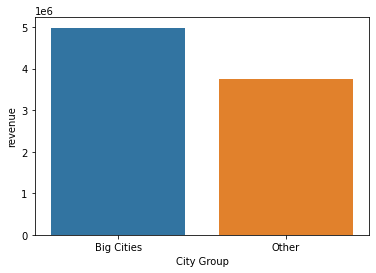

In [116]:
cityPerc = trainData[['City Group', 'revenue']].groupby(['City Group'], as_index=False).mean()
sns.barplot(x='City Group', y='revenue', data=cityPerc)

# Sorting the cities by revenue; getting the max earned cities

<AxesSubplot:xlabel='City', ylabel='revenue'>

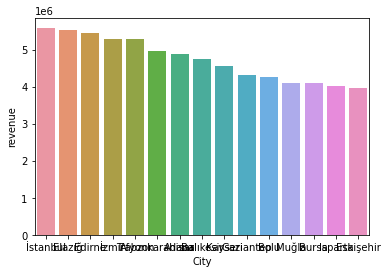

In [117]:
cityPerc = trainData[['City', 'revenue']].groupby(['City'], as_index=False).mean()
newDf = cityPerc.sort_values(['revenue'], ascending=False)
sns.barplot(x='City', y='revenue', data=newDf.head(15))

<AxesSubplot:xlabel='City', ylabel='revenue'>

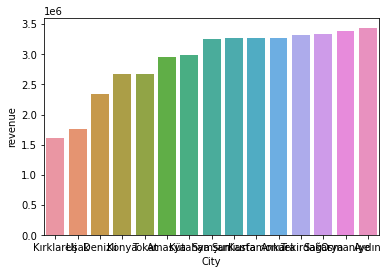

In [118]:
cityPerc = trainData[['City', 'revenue']].groupby(['City'], as_index=False).mean()
newDf = cityPerc.sort_values(['revenue'], ascending=True)
sns.barplot(x='City', y='revenue', data=newDf.head(15))

# Plot about revenue of specific restaurant types

<AxesSubplot:xlabel='Type', ylabel='revenue'>

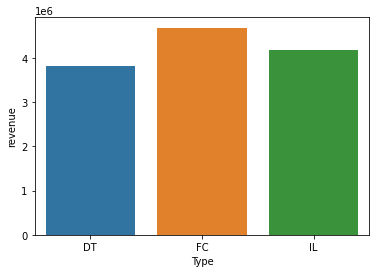

In [119]:
typePerc = trainData[['Type', 'revenue']].groupby(['Type'], as_index=False).mean()
sns.barplot(x='Type', y='revenue', data=typePerc)

# Plot about working days of specific restaurant types

<AxesSubplot:xlabel='Type', ylabel='OpenDays'>

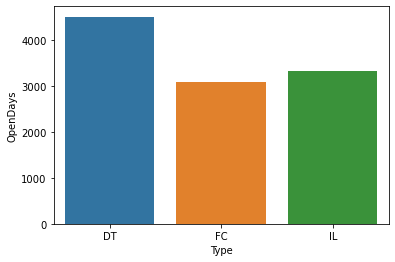

In [120]:
openDaysPerc = trainData[['Type', 'OpenDays']].groupby(['Type'], as_index=False).mean()
sns.barplot(x='Type', y='OpenDays', data=openDaysPerc)

In [121]:
trainData.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,5,3,4,5,5,4,3,4,5653753.0,6743
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,6923131.0,3609
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,0,2055379.0,1759
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,25,12,10,6,18,12,12,6,2675511.0,2160
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,5,1,3,2,3,4,3,3,4316715.0,3159


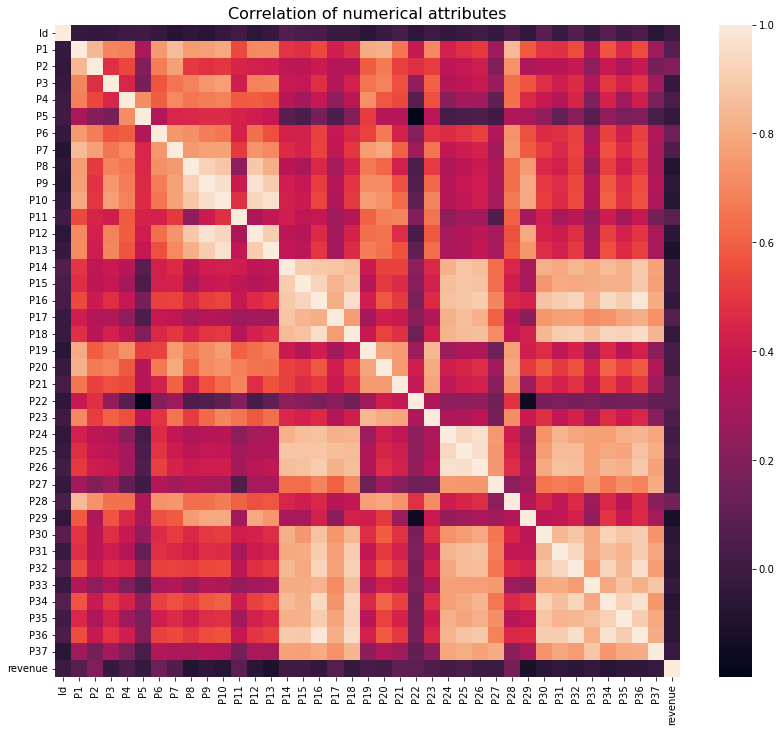

In [122]:
# Correlation
correlation = trainData[num_col].corr()

f, ax = plt.subplots(figsize=(14,12))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlation)
plt.show()

In [123]:
correlation['revenue'].sort_values(ascending=False)

revenue    1.000000
P2         0.191518
P28        0.155534
P6         0.139094
P21        0.097411
P11        0.084247
P22        0.083562
P1         0.070217
P17        0.067137
P7         0.051165
P23        0.045507
P25        0.036365
P4         0.035685
P19        0.027984
P24        0.014222
P20        0.014147
P14        0.006441
P15        0.000742
Id        -0.006277
P26       -0.007650
P27       -0.013680
P37       -0.019051
P3        -0.024613
P5        -0.028191
P33       -0.032426
P18       -0.034537
P16       -0.037997
P31       -0.040418
P35       -0.050156
P9        -0.050352
P36       -0.050534
P12       -0.062193
P32       -0.065857
P30       -0.066203
P34       -0.072343
P10       -0.073220
P8        -0.084215
P13       -0.105085
P29       -0.114846
Name: revenue, dtype: float64

In [124]:
# removing irrelevant columns
trainData = trainData.drop('Open Date', axis=1)
trainData = trainData.drop('Id', axis=1)
trainData.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,5,3,4,5,5,4,3,4,5653753.0,6743
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,0,6923131.0,3609
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,0,0,2055379.0,1759
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,25,12,10,6,18,12,12,6,2675511.0,2160
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,5,1,3,2,3,4,3,3,4316715.0,3159


## Feature engineering, converting categorical features

In [125]:
cityGroupDummyTrain = pd.get_dummies(trainData['City Group'])
trainData = trainData.join(cityGroupDummyTrain)

In [126]:
trainData = trainData.drop('City Group', axis=1)
trainData.head()

,City,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P32,P33,P34,P35,P36,P37,revenue,OpenDays,Big Cities,Other
0,İstanbul,IL,4,5.0,4.0,4.0,2,2,5,4,...,4,5,5,4,3,4,5653753.0,6743,1,0
1,Ankara,FC,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,0,0,6923131.0,3609,1,0
2,Diyarbakır,IL,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,0,0,0,2055379.0,1759,0,1
3,Tokat,IL,6,4.5,6.0,6.0,4,4,10,8,...,10,6,18,12,12,6,2675511.0,2160,0,1
4,Gaziantep,IL,3,4.0,3.0,4.0,2,2,5,5,...,3,2,3,4,3,3,4316715.0,3159,0,1


# Data Preprocessing for test data

In [127]:
testData['Open Date'] = pd.to_datetime(testData['Open Date'], format='%m/%d/%Y')
testData['OpenDays'] = ""

dateLastTest = pd.DataFrame({ 'Date': np.repeat(['01/01/2015'], [len(testData)]) })
dateLastTest['Date'] = pd.to_datetime(dateLastTest['Date'], format='%m/%d/%Y')

testData['OpenDays'] = dateLastTest['Date'] - testData['Open Date']
testData['OpenDays'] = testData['OpenDays'].astype('timedelta64[D]').astype(int)

cityGroupDummyTest = pd.get_dummies(testData['City Group'])
testData = testData.join(cityGroupDummyTest)

testData = testData.drop('City Group', axis=1)
testData = testData.drop('Open Date', axis=1)

In [155]:
X_train = pd.DataFrame({ 'OpenDays': trainData['OpenDays'].apply(np.log), 'Big Cities': trainData['Big Cities'],
                        'Other': trainData['Other'], 'P1': trainData['P1'], 
                        'P2': trainData['P2'],'P4': trainData['P4'], 
                        'P5': trainData['P5'], 'P6': trainData['P6'], 
                        'P7': trainData['P7'], 'P11': trainData['P11'], 
                        'P14': trainData['P14'], 'P15': trainData['P15'], 
                        'P17': trainData['P17'], 'P19': trainData['P19'], 
                        'P20': trainData['P20'], 'P21': trainData['P21'], 
                        'P23': trainData['P23'],'P14': trainData['P14'], 
                        'P15': trainData['P15'], 'P28': trainData['P28']
                        })

y_train = trainData['revenue'].apply(np.log)

X_test = pd.DataFrame({ 'OpenDays': testData['OpenDays'].apply(np.log), 'Big Cities': testData['Big Cities'],
                        'Other': testData['Other'], 'P1': testData['P1'], 
                        'P2': testData['P2'],'P4': testData['P4'], 
                        'P5': testData['P5'], 'P6': testData['P6'], 
                        'P7': testData['P7'], 'P11': testData['P11'], 
                        'P14': testData['P14'], 'P15': testData['P15'], 
                        'P17': testData['P17'], 'P19': testData['P19'], 
                        'P20': testData['P20'], 'P21': testData['P21'], 
                        'P23': testData['P23'],'P14': testData['P14'], 
                        'P15': testData['P15'], 'P28': testData['P28']
                        })

# Standardize features by removing the mean scaling to unit variance

In [156]:
# standard scaling for model efficiency
from sklearn.preprocessing import StandardScaler

# Usar pipeline
# Ver como usar somente um transform
sc = StandardScaler(with_std=True, with_mean=True, copy=True)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Model - Linear Regression

In [157]:
from sklearn.linear_model import LinearRegression

# create linear regression object
linear_regression = LinearRegression()

# train the model using the training sets
linear_regression.fit(X_train, y_train)

# make prediction using the test set
linear_prediction = linear_regression.predict(X_test)

linear_prediction

array([15.27431327, 14.89798773, 14.97171049, ..., 15.3612451 ,
       15.20835651, 15.20995169])

# Model - RandomForestRegressor

In [158]:
# training the model with RandomForestRegressor
forest = RandomForestRegressor(n_estimators=150)
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150)

In [159]:
pred = forest.predict(X_test)
pred = numpy.exp(pred)
score = forest.score(X_train, y_train)
print('Score is calculated as: ', score)

Score is calculated as:  0.8784475961870162


# Model - XGBoost Regressor

In [163]:
import xgboost as xgb

best_xgb_model = xgb.XGBRegressor(colapse_bytree=0.4, 
                                      gama=0,
                                      learning_rate=0.07,
                                      max_depth=3,
                                      min_child_weight=1.5,
                                      n_estimators=10000,
                                      reg_alpha=0.75,
                                      reg_lambda=0.45,
                                      subsample=0.6,
                                      seed=42)

xgbr = best_xgb_model.fit(X_train, y_train)

[21:59:21] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "colapse_bytree", "gama" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [164]:
xgbr_score = xgbr.score(X_train, y_train)
print('Score is calculated as: ', xgbr_score)

Score is calculated as:  0.9777626756150001
